In [1]:
import glob
import pandas as pd
import scipy.constants as scc
from scipy.optimize import curve_fit
from astropy.cosmology import FlatLambdaCDM
import astropy.units as u
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting
import scipy as sc
import scipy.stats as stats
from scipy.integrate import quad
from matplotlib.offsetbox import AnchoredText
from astropy.table import Table
import warnings
import os
import time
from numpy import inf

In [2]:
import matplotlib
'''
font = {
        'size'   : 16,
        'family':'Serif',}

matplotlib.rc('font', **font)
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'
'''
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'
matplotlib.rcParams['font.size'] = 30
matplotlib.rcParams['xtick.direction'] = 'in'
matplotlib.rcParams['ytick.direction'] = 'in'

In [3]:
import SfrCalculate

In [4]:
def MS(m, z, a0=1.5, a1=0.3, a2=2.5, m0=0.5, m1=0.36):
    r = np.log10(1 + z)
    M = np.log10(m/1e9)
    p = M-m1-a2*r
    p[p<0] = 0
    return M - m0 + a0*r - a1*p**2

In [5]:
def MS2(m, z):
    return m**0.81 * (1+z)**2.95

In [6]:
def sfr_calculate(nuv_flux, L_IR, z):
    cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
    d_L = cosmo.luminosity_distance(z).to(u.cm)
    L_v = 4*3.14*d_L.value**2*nuv_flux * 1e-29  # from uJy to erg/s/cm^2
    L_UV = 1.5 * 3e8 / 2.8e-7 * L_v / 3.82e33   # 2800 angstrom = 2.8e-7 meter; in unit of L_sun
    SFR_UV = 2.2 * 1.09e-10 * L_UV
    SFR_IR = 1.09e-10 * L_IR
    return SFR_UV + SFR_IR

In [7]:
def nuv_to_sfr(nuv_flux, redshift):
    cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
    d_L = cosmo.luminosity_distance(redshift).to(u.cm)
    L_v = 4*3.14*d_L.value**2*nuv_flux
    # L_UV = 1.5 * nu(2800) *Lv(2800) 
    L_UV = 1.5 * 3e8 / 2.8e-7 * L_v / 3.82e33
    SFR_UV = 2.2 * 1.09e-10 * L_UV
    return SFR_UV

In [8]:
def clean_data(array):
    array[array<0]=0
    array[array== inf]=0
    array[array== -inf]=0
    array[np.isnan(array)]=0
    return array

In [9]:
def clean_log(array):
    array[np.where(np.log10(array)<0)]=2
    return array

## 1.2mm flux and err, NUV flux and error, $M_*$ and error, $\mathrm{SFR_{eazy}}$ and error  are de-magnified

ratio: [] []
sfr error: [41.] ['m1931']
excluded: 0
ratio: [] []
sfr error: [215. 294.  46.  19.  50.  10.  75.] ['a0102' 'a0102' 'm0159' 'm0429' 'm1423' 'r0949' 'r1347']
excluded: 0
ratio: [] []
sfr error: [117.] ['m0416']
excluded: 0
ratio: [] []
sfr error: [4.] ['m1115']
excluded: 0
ratio: [] []
sfr error: [40. 13. 11. 49.] ['a3192' 'm0257' 'm0329' 'm0417']
excluded: 0


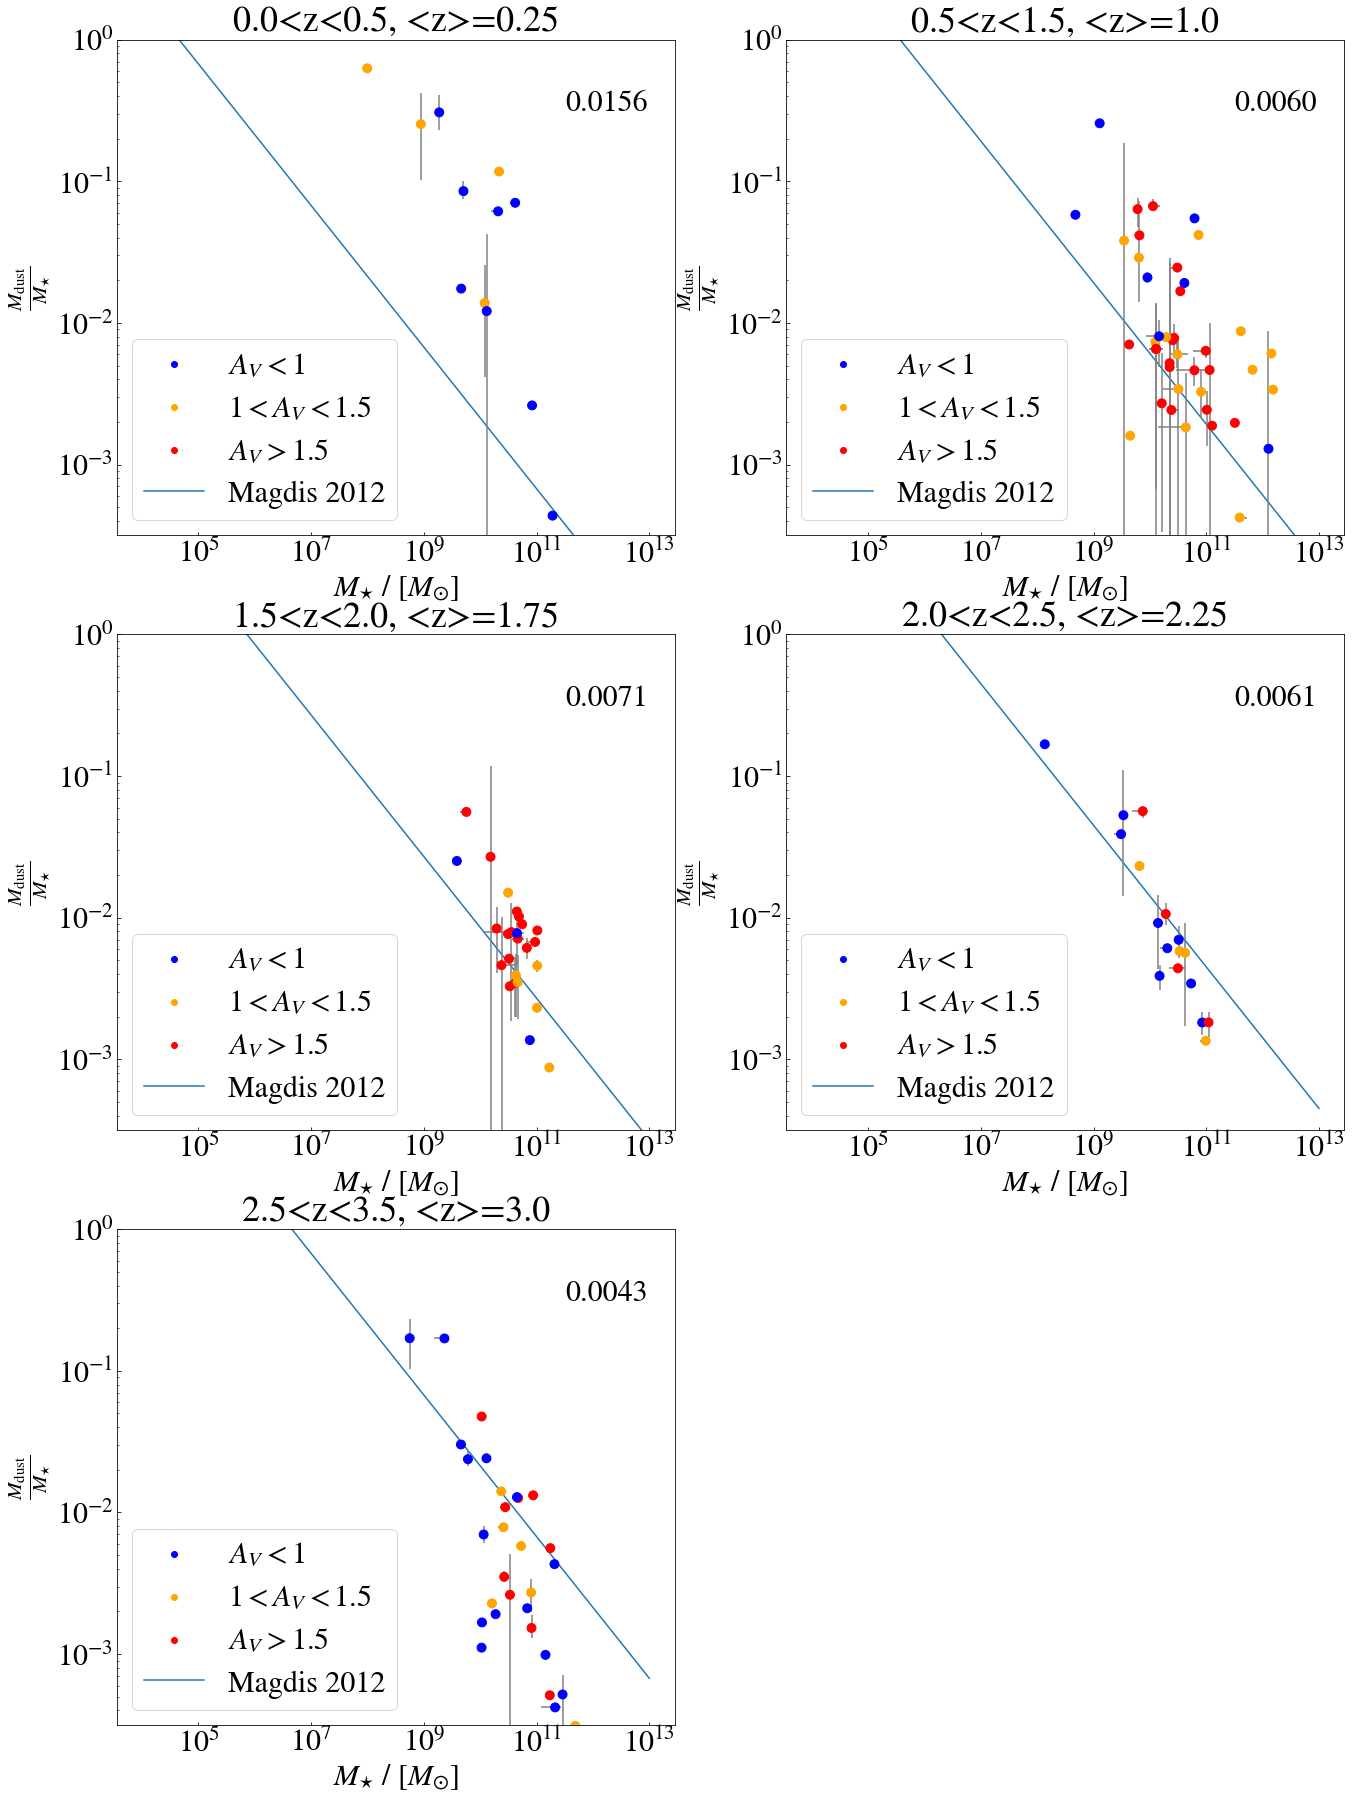

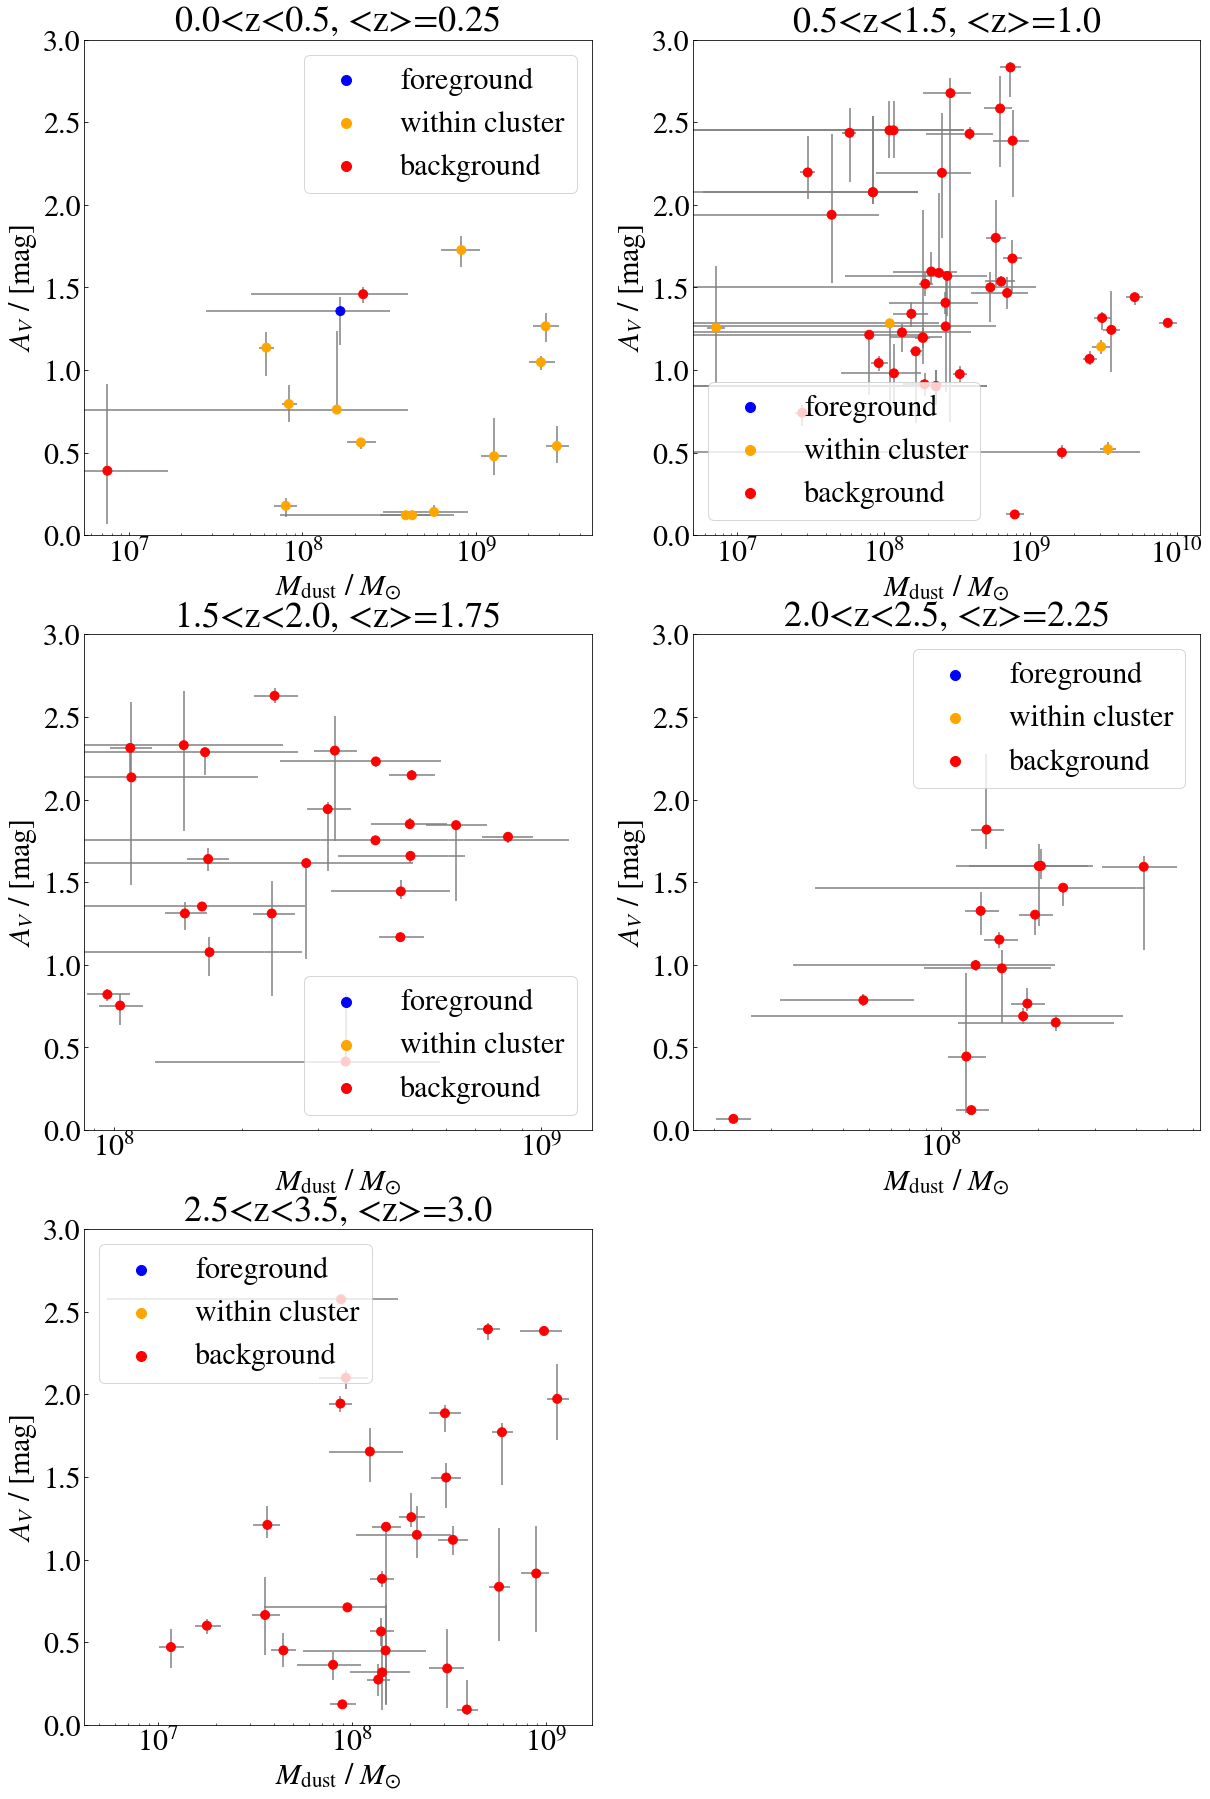

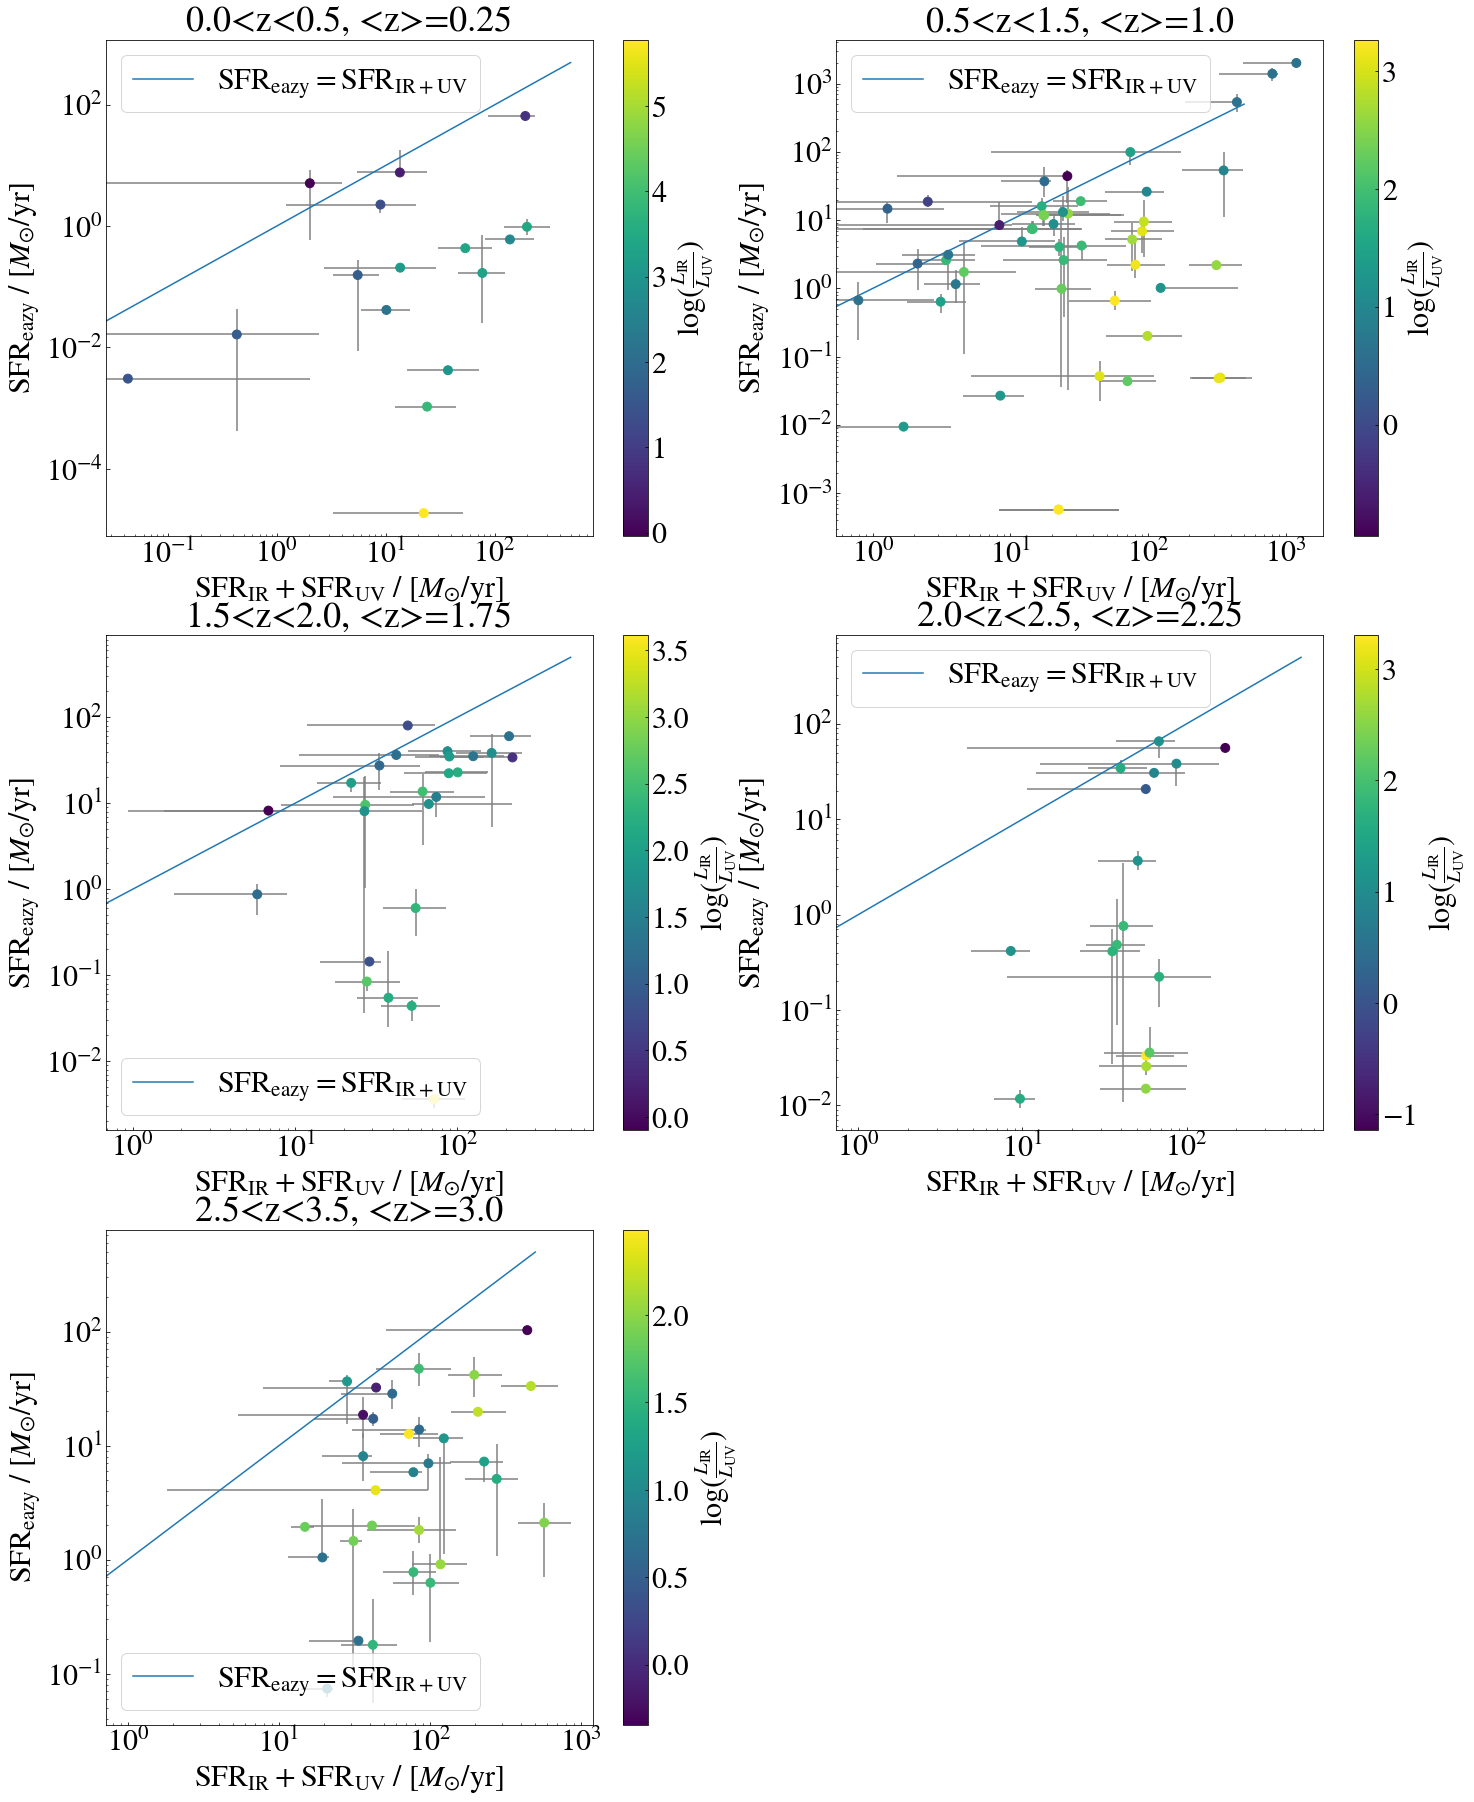

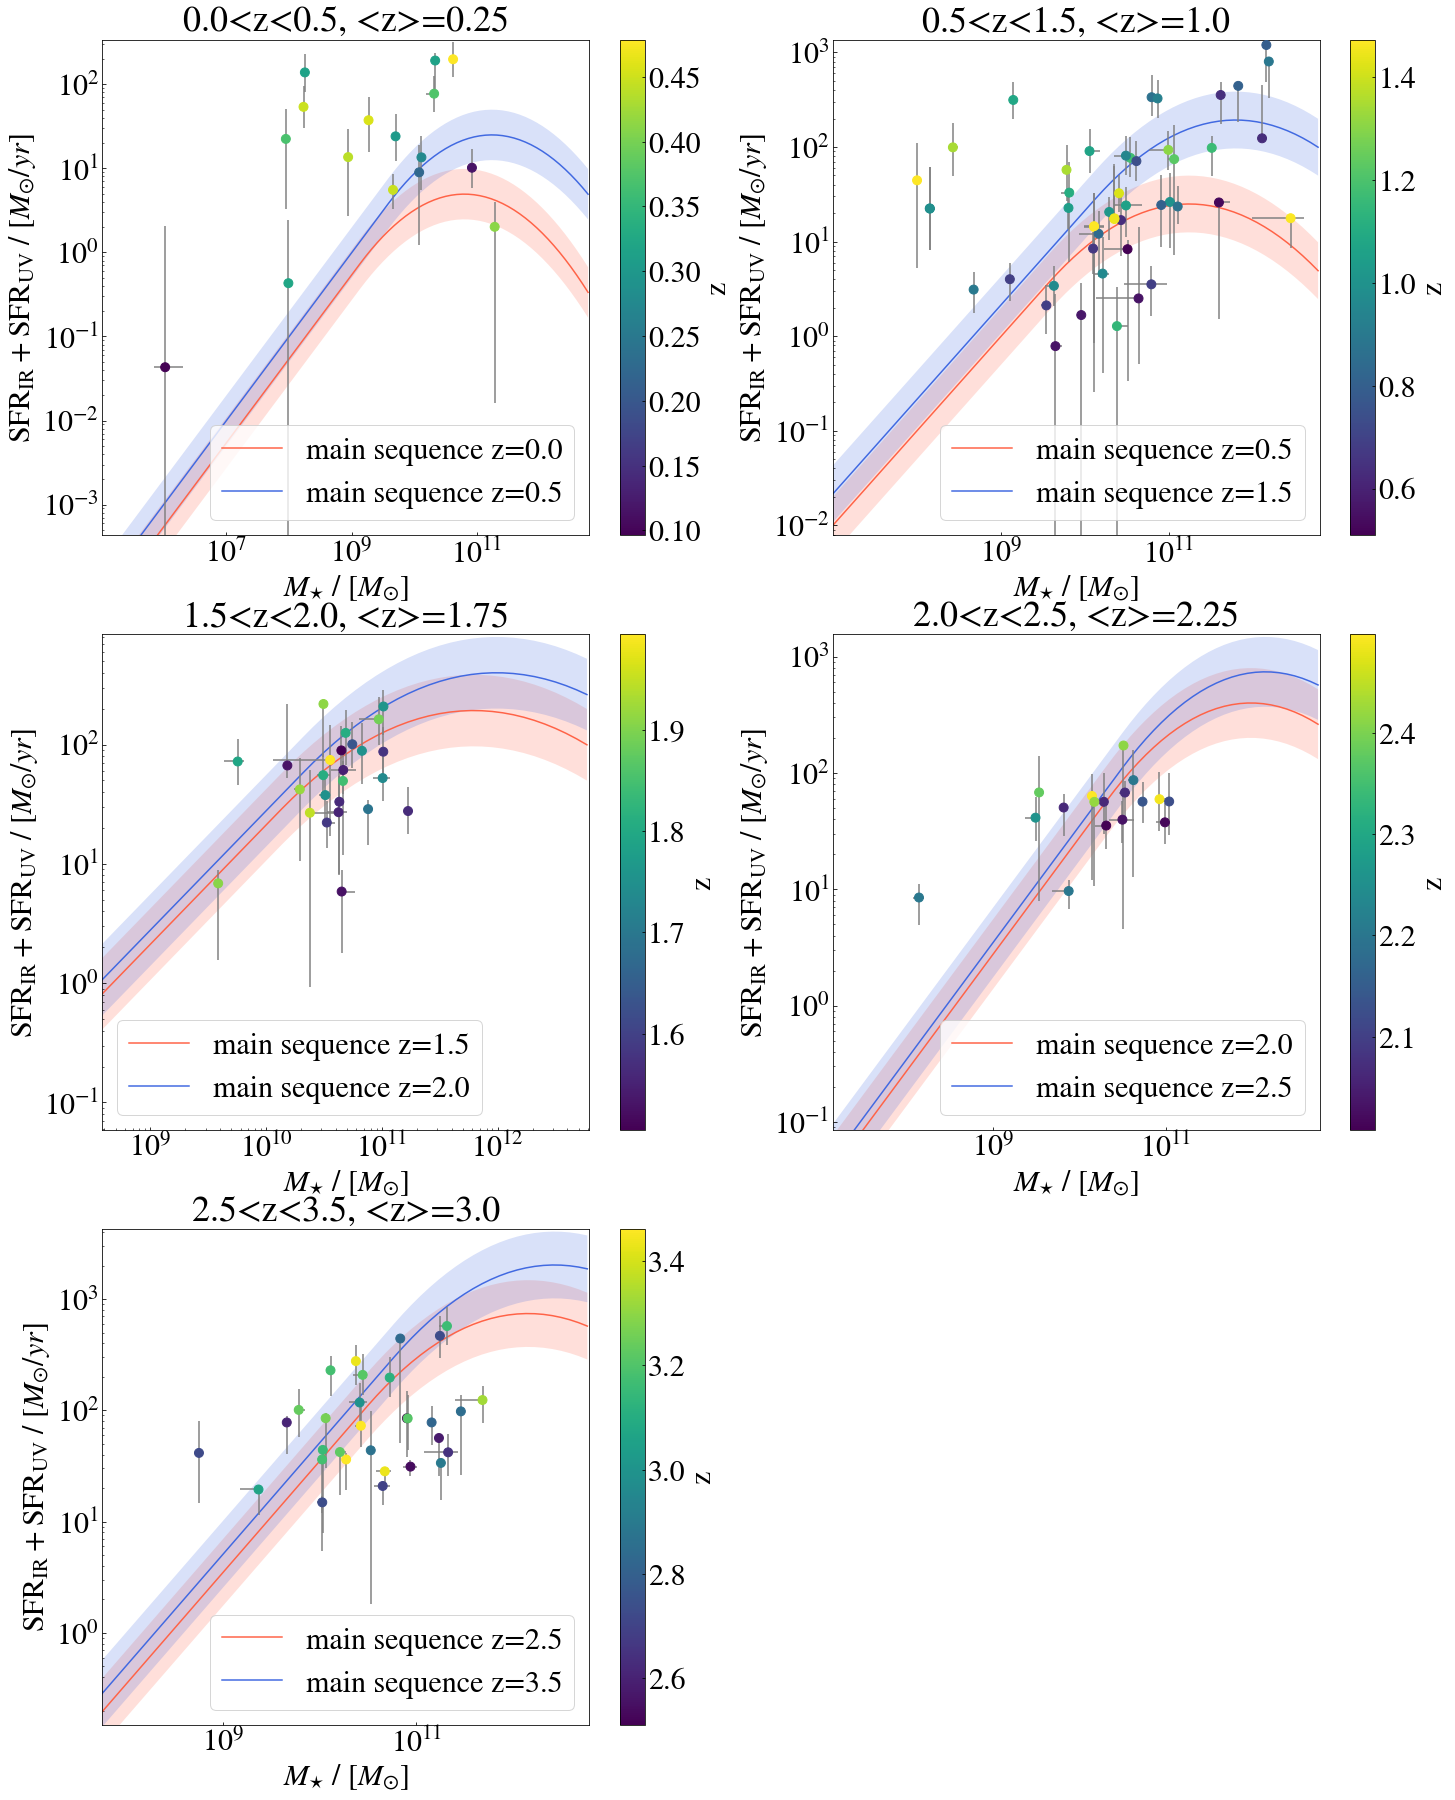

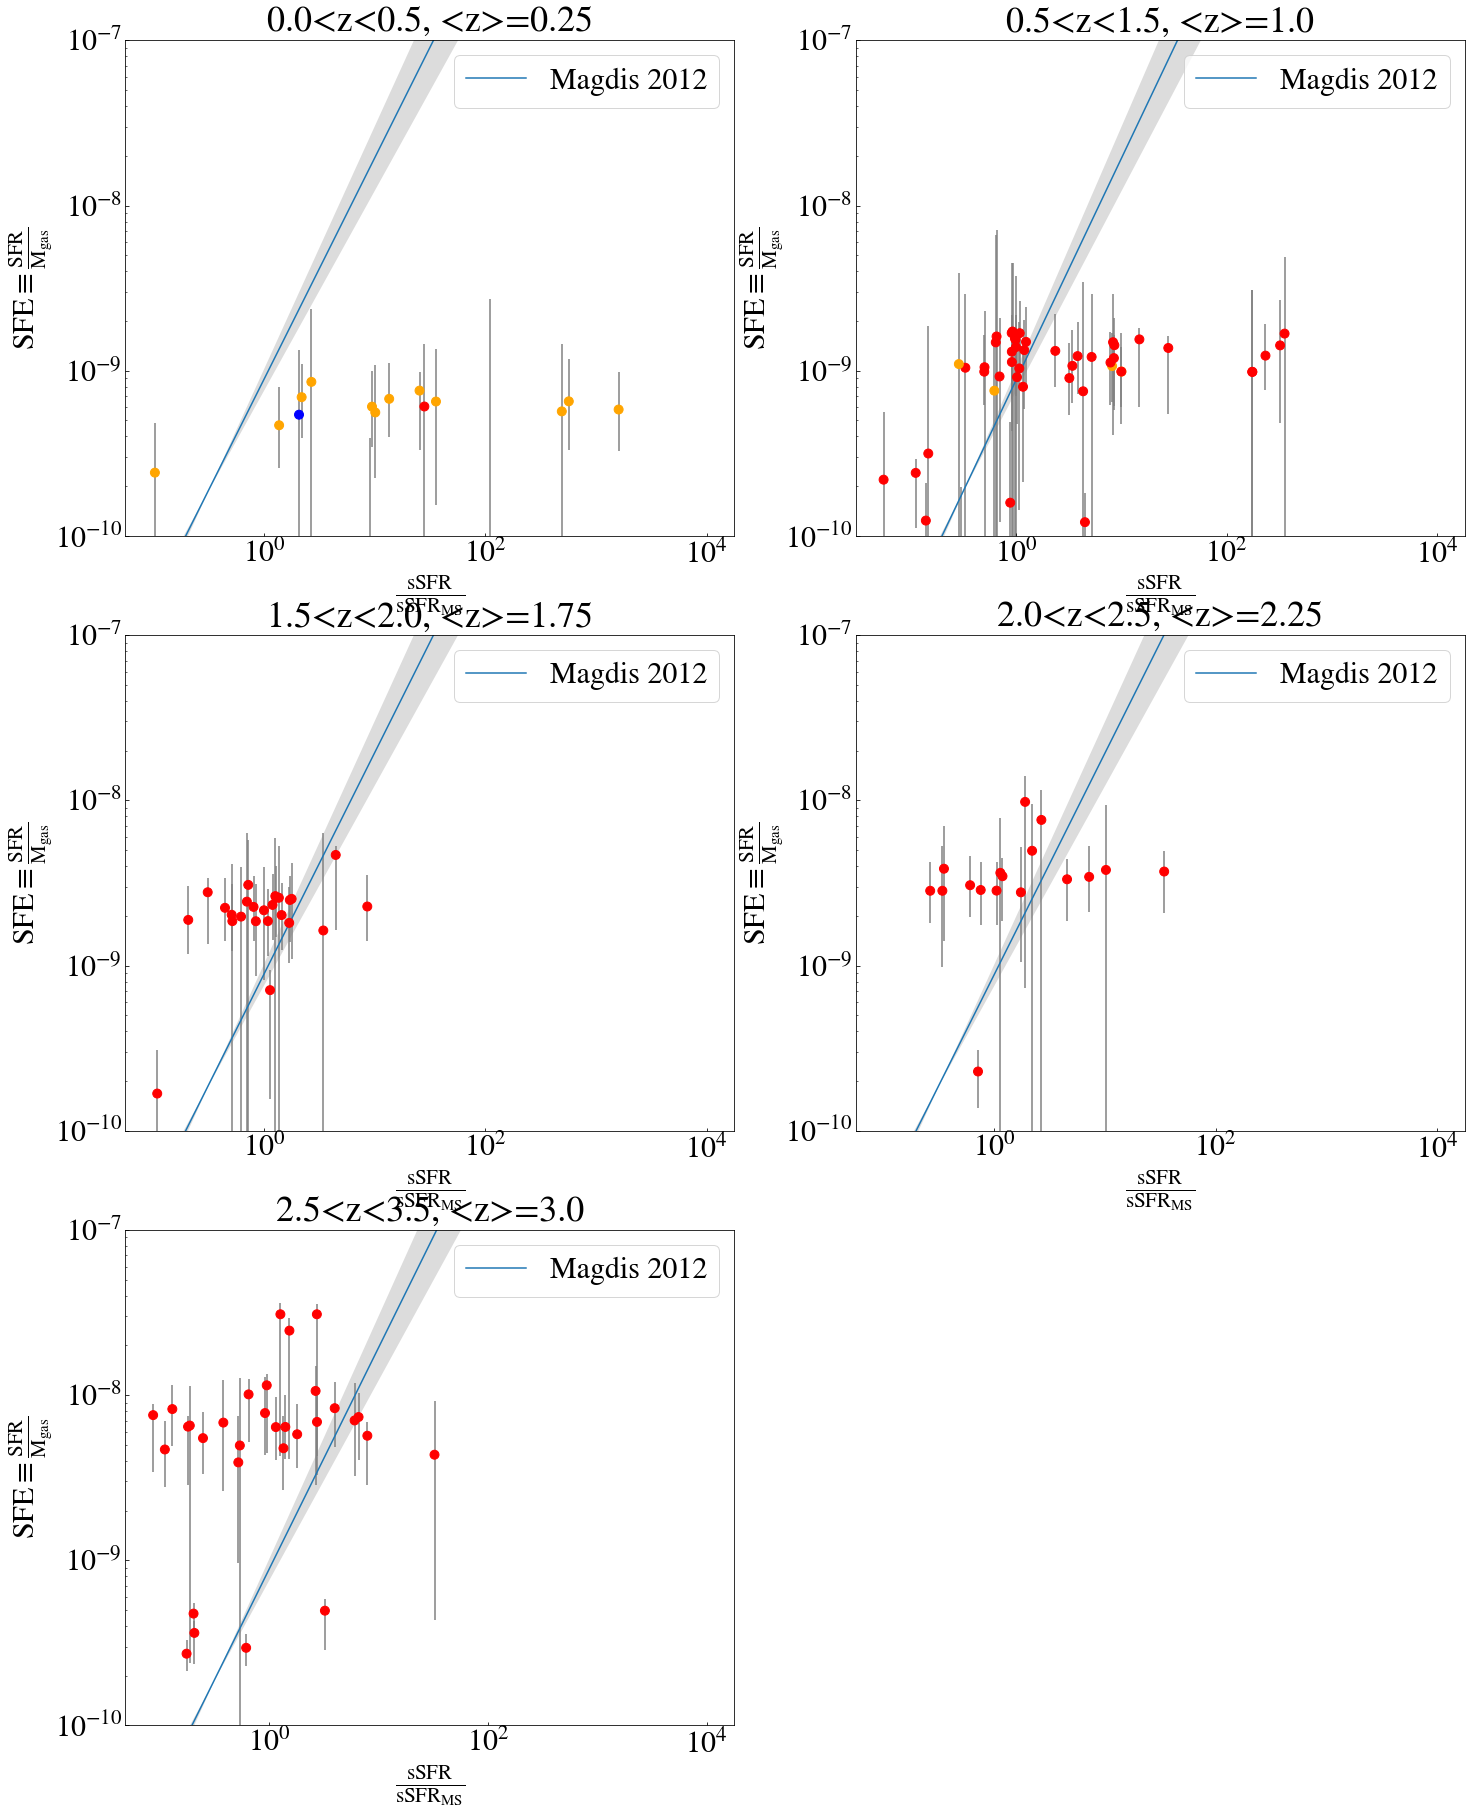

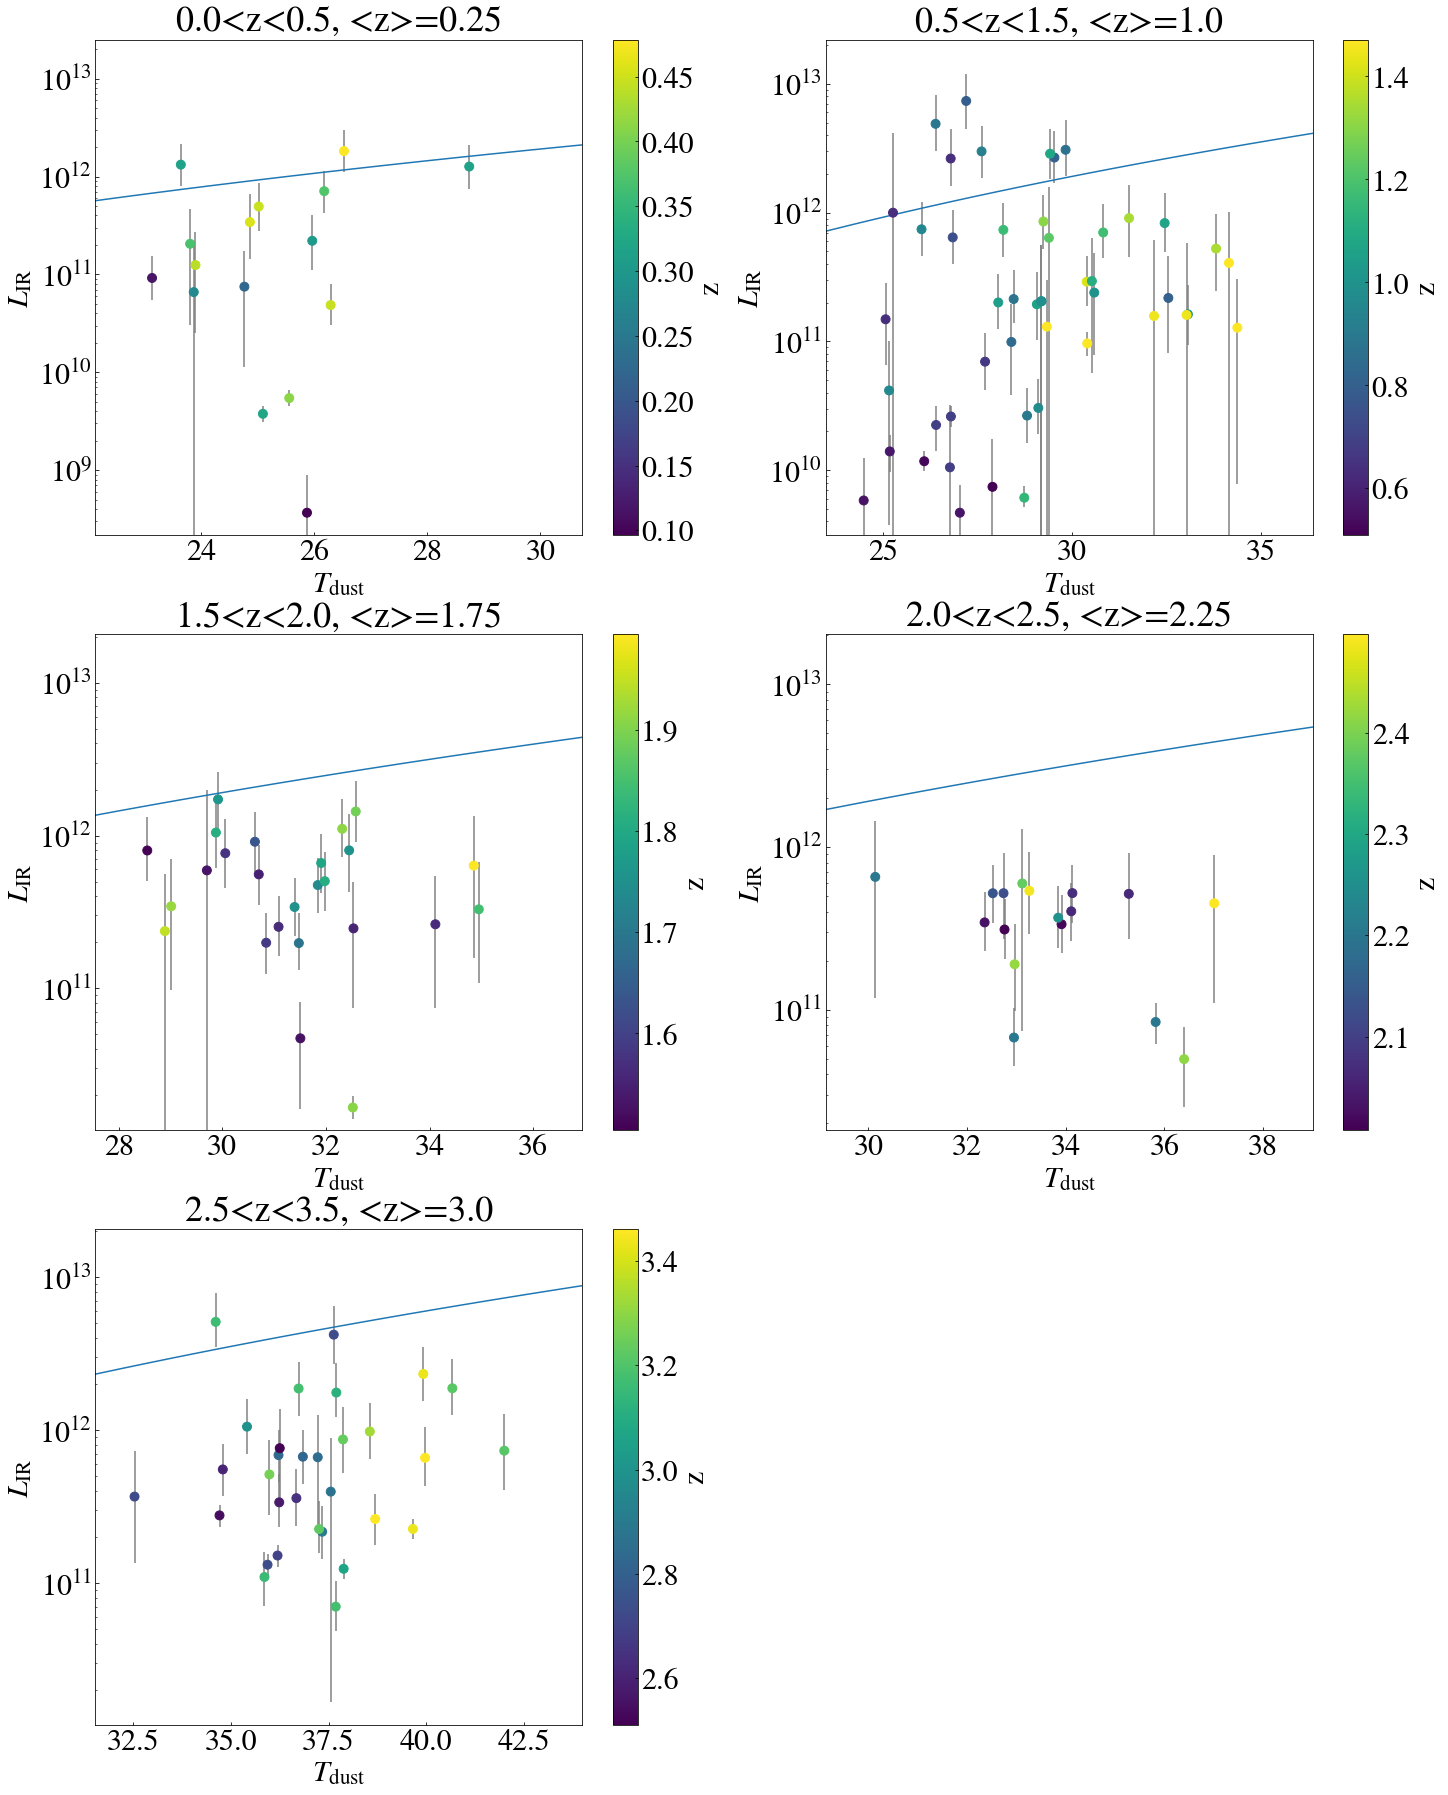

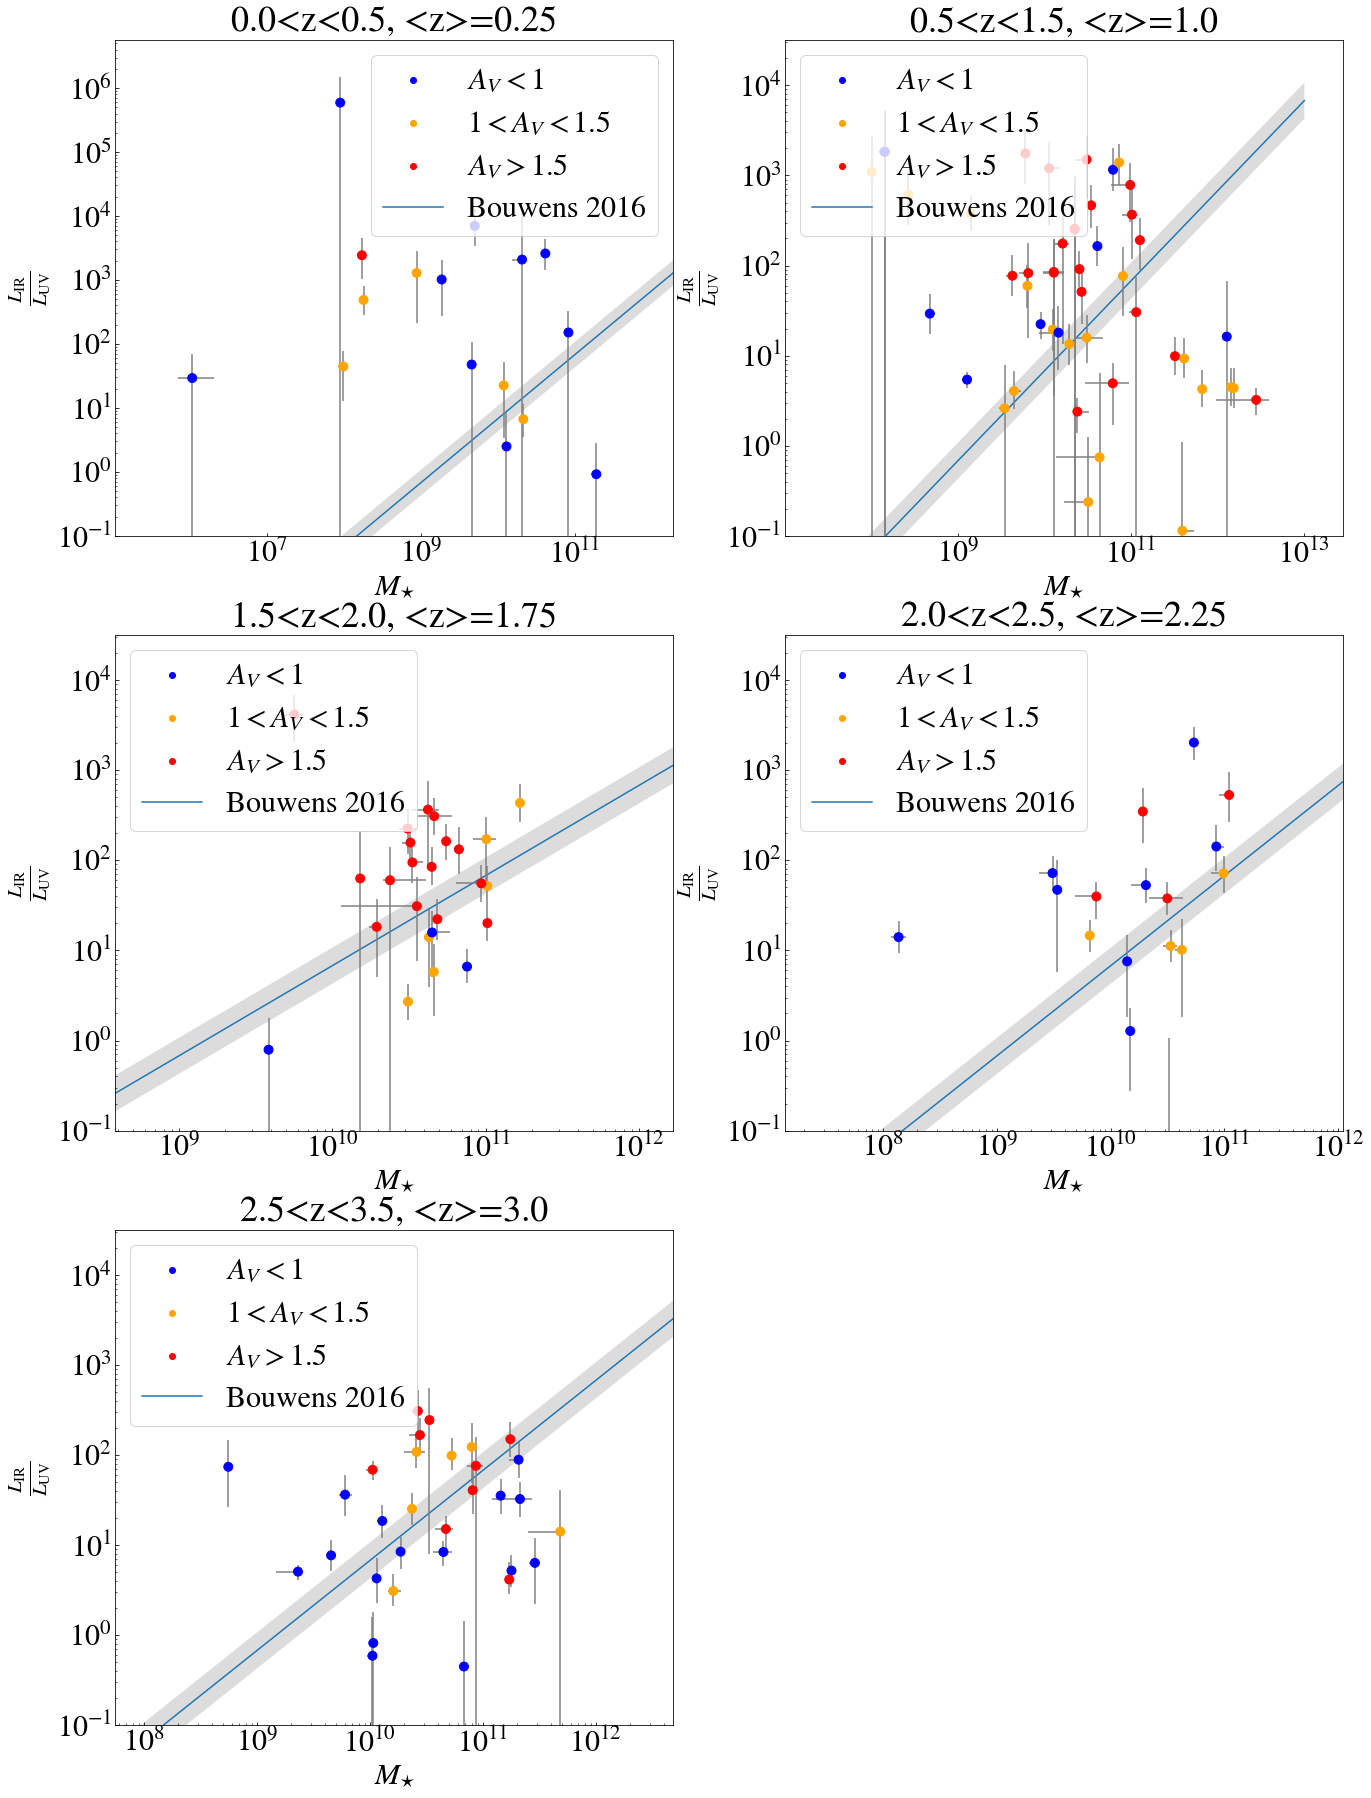

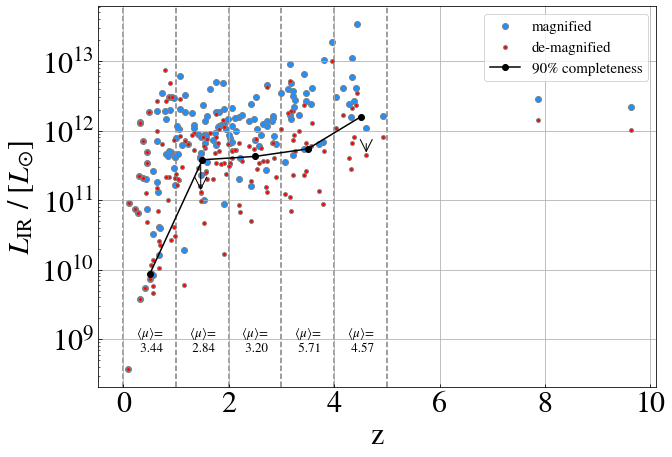

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

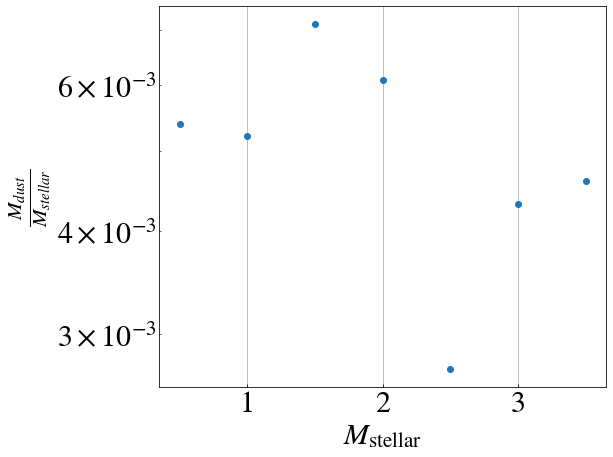

In [10]:
import multiprocessing as mp
import multiprocessing

warnings.filterwarnings("ignore")

cosmo = FlatLambdaCDM(H0=70 * u.km / u.s / u.Mpc, Om0=0.3)
sigma = 5.67e-5 # s-b constants
count=0
mass=[]
sfr=[]
mass2 = np.logspace(5, 13, 100)
mass2_sorted = np.sort(mass2)
log10_sfr_ms0 = MS(mass2_sorted, z=0)
ecolor='gray'
log10_sfr_ms1 = MS(mass2_sorted, z=3)
if __name__ == '__main__':
    tic = time.time()
    
    warnings.filterwarnings("ignore")
    mass2 = np.logspace(4, 13, 100)
    index=5
    mass_sorted = mass2
    SFR_IR=[]
    SFR_UV=[]
    L_IR=[]
    L_UV=[]
    L_UV_err=[]
    M_dust=[]
    Av=[]
    ra=[]
    dec=[]
    Av_16=[]
    Av_84=[]
    SFR_eazy=[]
    SFR_eazy_16=[]
    SFR_eazy_84=[]
    M_stellar=[]
    M_stellar_16=[]
    M_stellar_84=[]
    M_gas=[]
    mu=[]
    T_dust=[]
    M_err_16=[]
    M_err_84=[]
    flux_alma=[]
    flux_alma_err=[]
    z=[]
    file_name=[]
    L_err_16=[]
    L_err_84=[]
    colors=[]
    full_name=[]
    id_alma=[]
    sep=[]
    f160w_snr=[]
    flag=False
    os.chdir('/home/yjm/miniconda/Outputs')
    files_list = glob.glob('*')
    fig1, axes1 = plt.subplot_mosaic([['1','2'], ['3','4'], ['a', 'X']], empty_sentinel="X", figsize=(22, 31))
    axes1 = list(axes1.values())
    fig2, axes2 = plt.subplot_mosaic([['1','2'],[ '3','4'],[ 'a', 'X']], empty_sentinel="X", figsize=(20, 31))
    axes2 = list(axes2.values())
    fig3, axes3 = plt.subplot_mosaic([['1','2'],[ '3','4'],[ 'a', 'X']], empty_sentinel="X", figsize=(24, 31))
    axes3 = list(axes3.values())
    fig4, axes4 = plt.subplot_mosaic([['1','2'],[ '3','4'],[ 'a', 'X']], empty_sentinel="X", figsize=(24, 31))
    axes4 = list(axes4.values())
    fig5, axes5 = plt.subplot_mosaic([['1','2'],[ '3','4'],[ 'a', 'X']], empty_sentinel="X", figsize=(24, 31))
    axes5 = list(axes5.values())
    fig6, axes6 = plt.subplot_mosaic([['1','2'],[ '3','4'],[ 'a', 'X']], empty_sentinel="X", figsize=(24, 31))
    axes6 = list(axes6.values())
    fig7, axes7 = plt.subplot_mosaic([['1','2'],[ '3','4'],[ 'a', 'X']], empty_sentinel="X", figsize=(22, 31))
    axes7 = list(axes7.values())
    color='tomato'
    z_bins = np.array([[0., 0.5, 0.25],[0.5, 1.5, 1.0],[1.5, 2.0, 1.75], [2.0, 2.5, 2.25], [2.5, 3.5, 3.]])
    #pool = NonDaemonPool(3) 
    pool = mp.Pool(3)
    p = pool.map(SfrCalculate.main_body, files_list)

    num_bins = 40
    for a in p:
        if type(a) is tuple:
            (ra_, dec_, sfr_ir, sfr_uv, l_ir,l_uv, l_uv_err, m_dust, Av_, sfr_eazy, m_stellar, m_gas, m_16, m_84, z_, l_16, l_84, color, name, id_, mu_, m_stellar_16, m_stellar_84, sfr_eazy_16, sfr_eazy_84, av_16, av_84, t_dust, Full_name, flux_alma_, flux_alma_err_, sep_, h_snr) = a
            SFR_IR = np.append(SFR_IR, sfr_ir)
            SFR_UV = np.append(SFR_UV, sfr_uv)
            L_IR = np.append(L_IR, l_ir)
            L_UV = np.append(L_UV, l_uv)
            L_UV_err = np.append(L_UV_err, l_uv_err)
            M_dust = np.append(M_dust, m_dust)
            Av = np.append(Av, Av_)
            Av_16 = np.append(Av_16, av_16)
            Av_84 = np.append(Av_84, av_84)
            mu = np.append(mu, mu_)
            T_dust = np.append(T_dust, t_dust)
            ra = np.append(ra, ra_)
            dec = np.append(dec, dec_)
            file_name = np.append(file_name, name)
            SFR_eazy = np.append(SFR_eazy, sfr_eazy)
            SFR_eazy_16 = np.append(SFR_eazy_16, sfr_eazy_16)
            SFR_eazy_84 = np.append(SFR_eazy_84, sfr_eazy_84)
            M_stellar = np.append(M_stellar, m_stellar)
            M_stellar_16 = np.append(M_stellar_16, m_stellar_16)
            M_stellar_84 = np.append(M_stellar_84, m_stellar_84)
            M_gas = np.append(M_gas, m_gas)
            M_err_16 = np.append(M_err_16, m_16)
            M_err_84 = np.append(M_err_84, m_84)
            z = np.append(z, z_)
            L_err_16 = np.append(L_err_16, l_16)
            L_err_84 = np.append(L_err_84, l_84)
            id_alma = np.append(id_alma, id_)
            colors = np.append(colors, color)
            full_name = np.append(full_name, Full_name)
            flux_alma = np.append(flux_alma, flux_alma_)
            flux_alma_err = np.append(flux_alma_err, flux_alma_err_)
            sep = np.append(sep, sep_)
            f160w_snr = np.append(f160w_snr, h_snr)
    SFR = SFR_IR + SFR_UV
    SFR_IR_err16 = 1.09e-10 * L_err_16
    SFR_UV_err = 2.2 * 1.09e-10 * L_UV_err
    SFR_IR_err84 = 1.09e-10 * L_err_84
    SFR_16 = np.sqrt(SFR_IR_err16**2 + SFR_UV_err**2)    # error propogration
    SFR_84 = np.sqrt(SFR_IR_err84**2 + SFR_UV_err**2)    # error propogration
    SFR_errors = np.vstack([SFR - SFR_16, SFR_84 - SFR])
    SFR_errors = clean_data(SFR_errors)
    SFR_errors = clean_log(SFR_errors)
    Mdust_errors = np.vstack([M_dust - M_err_16, M_err_84 - M_dust])
    Mdust_errors = clean_data(Mdust_errors)
    M_stellar_errors = np.vstack((M_stellar - M_stellar_16, M_stellar_84 - M_stellar))
    M_stellar_errors = clean_data(M_stellar_errors)
    dust_ratio_errors = np.sqrt((Mdust_errors/M_dust)**2 + (M_stellar_errors/M_stellar)**2) * Mdust_errors / M_stellar
    dust_ratio_errors = clean_data(dust_ratio_errors)
    SFR_eazy_errors = np.vstack((SFR_eazy - SFR_eazy_16, SFR_eazy_84 - SFR_eazy))
    SFR_eazy_errors = clean_data(SFR_eazy_errors)
    Av_errors = np.vstack((Av - Av_16, Av_84 - Av))
    Av_errors = clean_data(Av_errors)
    L_IR_errors = np.vstack((L_IR - L_err_16, L_err_84 - L_IR))
    L_IR_errors = clean_data(L_IR_errors)
    L_IR_errors = clean_log(L_IR_errors)
    M_stellar[M_stellar<0]=0
    ratio = M_dust / M_stellar
    dust_ratio_errors[:,np.where(ratio>1)]=0
    ratio[ratio>1]=0
    ratio1 = L_IR/L_UV
    ratio1[np.isnan(ratio1)]=0
    mean_ratio = []
    for i in range(index):
        coor_z = np.where((z>z_bins[i,0]) & (z<z_bins[i,1]) & (flux_alma>0))
        log10_sfr_ms0 = MS(mass_sorted, z_bins[i,2])
        log10_sfr_ms0 = np.sort(log10_sfr_ms0)
        
        colors_av = np.chararray((Av[coor_z].size, ), itemsize=7, unicode=True)
        colors_av[:] = 'blue'
        colors_av[np.where(Av[coor_z]>1.5)]='red'
        colors_av[np.where((Av[coor_z]<1.5) & (Av[coor_z]>1))]='orange'
        colors_av[np.where((Av[coor_z]<1) & (Av[coor_z]>0))]='blue'
        
        ratio_th = 10**(5.63 - 0.5*np.log10(mass_sorted) -2)
        ratio_th2 = 10**(5.63 - 0.5*np.log10(mass_sorted) -2)
        ratio_th_low = 10**(6.02 - 0.41*np.log10(mass_sorted) -2)
        ratio_th_high = 10**(5.24 - 0.61*np.log10(mass_sorted) -2)
        print('ratio:',id_alma[coor_z][np.where(ratio[coor_z]>1)], file_name[coor_z][np.where(ratio[coor_z]>1)])
        print('sfr error:',id_alma[coor_z][np.where(SFR_errors[:,coor_z][:,0,:][0]>1e2)], file_name[coor_z][np.where(SFR_errors[:,coor_z][:,0,:][0]>1e2)])
        coor_limit = np.where(ratio<1)
        axes1[i].scatter(0,-1, color='blue', label=r'$A_V<1$')
        axes1[i].scatter(0,-2, color='orange', label=r'$1<A_V<1.5$')
        axes1[i].scatter(0,-3, color='red', label=r'$A_V>1.5$')
        axes1[i].scatter(M_stellar[coor_z], ratio[coor_z], c=colors_av, zorder=5, s=80)
        if i==0:
            axes1[i].plot(mass_sorted, ratio_th/20, label='Magdis 2012', zorder=0)
        if i==1:
            axes1[i].plot(mass_sorted, ratio_th/7, label='Magdis 2012', zorder=0)
        if i==2:
            axes1[i].plot(mass_sorted, ratio_th/5, label='Magdis 2012', zorder=0)
        if i==3:
            axes1[i].plot(mass_sorted, ratio_th/3, label='Magdis 2012', zorder=0)
        if i>3:
            axes1[i].plot(mass_sorted, ratio_th/2, label='Magdis 2012', zorder=0)
        axes1[i].text(10**(11.5), 10**(-0.5), str('{:.4f}'.format(np.median(ratio[coor_z]))))
        axes1[i].errorbar(M_stellar[coor_z], ratio[coor_z], xerr=M_stellar_errors[:,coor_z][:,0,:], yerr=dust_ratio_errors[:,coor_z][:,0,:], ecolor=ecolor, fmt='none', zorder=4)
        #axes1[i].grid()
        axes1[i].set_xlabel(r'$M_{\star} \ /  \ [M_{\odot}]  $')
        axes1[i].set_ylabel(r'$\frac{M_{\mathrm{dust}}}{M_{\star}}$')
        axes1[i].legend()
        axes1[i].set_xscale('log')
        axes1[i].set_yscale('log')
        axes1[i].set_title(str(z_bins[i,0])+'<z<'+str(z_bins[i,1])+', <z>='+str(z_bins[i,2]))
        axes1[i].set_ylim(10**(-3.5), 1)
        #axes1[5].scatter(M_stellar[coor_z], ratio[coor_z], label=str(z_bins[i,0])+'<z<'+str(z_bins[i,1]), c='blue', alpha=(i+1)*0.15)
        
        axes2[i].scatter(0,-1, color='blue', label='foreground', s=100)
        axes2[i].scatter(0,-2, color='orange', label='within cluster', s=100)
        axes2[i].scatter(0,-3, color='red', label='background', s=100)
        sc = axes2[i].scatter(M_dust[coor_z], Av[coor_z], c=colors[coor_z], zorder=5, s=80)
        axes2[i].errorbar(M_dust[coor_z], Av[coor_z], xerr=Mdust_errors[:,coor_z][:,0,:], yerr=Av_errors[:,coor_z][:,0,:], ecolor=ecolor,fmt='none', zorder=0)
        axes2[i].set_xlabel(r'$M_{\mathrm{dust}} \ /  \ M_{\odot}  $')
        #cbar = plt.colorbar(sc, ax=axes[i+index])
        #cbar.set_label('z')
        axes2[i].set_ylabel(r'$A_V$ / [mag]')
        axes2[i].set_ylim(0,3)
        axes2[i].set_xscale('log')
        axes2[i].legend()
        #axes2[i].grid()
        axes2[i].set_title(str(z_bins[i,0])+'<z<'+str(z_bins[i,1])+', <z>='+str(z_bins[i,2]))
        
        color1 = np.log10(L_IR[coor_z]/L_UV[coor_z])
        color2 = np.log10(L_UV[coor_z]/L_IR[coor_z]*10**(0.4*Av[coor_z]))
        sc = axes3[i].scatter(SFR[coor_z], SFR_eazy[coor_z], c=color1, zorder=5, s=80)
        axes3[i].errorbar(SFR[coor_z], SFR_eazy[coor_z], xerr=SFR_errors[:,coor_z][:,0,:], yerr=SFR_eazy_errors[:,coor_z][:,0,:], ecolor=ecolor,fmt='none', zorder=0)
        #axes[i+index*2].set_xlim(0,100)
        #axes[i+index*2].set_ylim(0, 100)
        x = np.arange(0,500)
        y = x
        cbar = plt.colorbar(sc, ax=axes3[i])
        cbar.set_label(r'log($\frac{L_{\mathrm{IR}}}{L_{\mathrm{UV}}}$)')
        axes3[i].plot(x, y, label=r'$\mathrm{SFR_{eazy} = SFR_{IR+UV}}$')
        axes3[i].set_xlabel(r'$\mathrm{SFR_{IR} + SFR_{UV}} \ / \ [M_{\odot} / \mathrm{yr}]  $')
        axes3[i].set_ylabel(r'$\mathrm{SFR_{eazy}}\ / \ [M_{\odot} / \mathrm{yr}]$')
        #axes3[i].grid()
        axes3[i].set_xscale('log')
        axes3[i].set_yscale('log')
        axes3[i].legend()
        axes3[i].set_title(str(z_bins[i,0])+'<z<'+str(z_bins[i,1])+', <z>='+str(z_bins[i,2]))
        
        sc = axes4[i].scatter(M_stellar[coor_z], SFR[coor_z], zorder=7, c=z[coor_z], s=80)
        #axes4[i].scatter(0, 1, c='blue', label=r'$A_V<1$')
        #axes4[i].scatter(0, 2, c='orange', label=r'$1<A_V<1.5$')
        #axes4[i].scatter(0, 0, c='red', label=r'$A_V>1.5$')
        axes4[i].errorbar(M_stellar[coor_z], SFR[coor_z], xerr=M_stellar_errors[:,coor_z][:,0,:], yerr=SFR_errors[:,coor_z][:,0,:], ecolor=ecolor,fmt='none', zorder=6)
        #axes[i+index*3].errorbar(M_stellar[coor_z], SFR[coor_z], yerr=Mdust_errors[:,coor_z], ecolor=ecolor,fmt='none', zorder=5)
        #                    log10(mass)-0.15
        log10_sfr_ms0 = MS(mass_sorted, z_bins[i,0])
        log10_sfr_ms1 = MS(mass_sorted, z_bins[i,1])
        axes4[i].plot(mass_sorted/1.698, 10**log10_sfr_ms0, label=('main sequence z='+str(z_bins[i,0])), c='tomato', zorder=2)
        axes4[i].fill_between(mass_sorted/1.698, 10**(log10_sfr_ms0-0.3), 10**(log10_sfr_ms0+0.3), facecolor='tomato',alpha=0.2, zorder=0)
        axes4[i].plot(mass_sorted/1.698, 10**log10_sfr_ms1, label=('main sequence z='+str(z_bins[i,1])), c='royalblue', zorder=2)
        axes4[i].fill_between(mass_sorted/1.698, 10**(log10_sfr_ms1-0.3), 10**(log10_sfr_ms1+0.3), facecolor='royalblue',alpha=0.2, zorder=0)
        axes4[i].minorticks_on()
        #axes4[i].grid()
        cbar=plt.colorbar(sc, ax=axes4[i])
        cbar.set_label('z')
        axes4[i].legend().set_zorder(17)
        axes4[i].set_xlim(np.amin(M_stellar[coor_z])/10, )
        '''
        for j in range(M_stellar[coor_z].size):
            #if 'red' in colors_av[j] and np.isnan(ratio1[coor_z][j])==False and M_stellar[coor_z][j]>0:
            if (z[coor_z][j]-z_bins[i,0])<0.1:
                axes4[i].annotate( text=str(id_alma[coor_z][j])+'_'+file_name[coor_z][j], xy=(M_stellar[coor_z][j],  SFR[coor_z][j]), c='purple', fontsize=15, zorder=16)
        '''
        minimum = np.amin(SFR[coor_z]/100)
        axes4[i].set_ylim(minimum, )
        axes4[i].set_xlabel(r'$M_{\star} \ / \ [M_{\odot}]$')
        axes4[i].set_xscale('log')
        axes4[i].set_yscale('log')
        axes4[i].set_ylabel(r'$\mathrm{SFR_{IR} + SFR_{UV}} \ / \ [M_{\odot} / yr]  $')
        axes4[i].set_title(str(z_bins[i,0])+'<z<'+str(z_bins[i,1])+', <z>='+str(z_bins[i,2]))

        sSFR_ms = 10**(MS(M_stellar, z)) / M_stellar
        sSFR = SFR / M_stellar
        SFE = SFR / M_gas
        M_gas_error = 100 * Mdust_errors
        SFE_errors = np.sqrt((SFR_errors/SFR)**2 + (M_gas_error/M_gas)**2) * SFE
        SFE_errors = clean_data(SFE_errors)
        x = np.logspace(-1, 4, 100)
        y = 1.09e-10 * 8.1 * x**1.34   # Magdis 2012
        y1 = 1.09e-10 * 6.9 * x**1.21
        y2 = 1.09e-10 * 9.3 * x**1.47
        axes5[i].scatter(sSFR[coor_z] / sSFR_ms[coor_z], SFE[coor_z], c=colors[coor_z], zorder=2, s=80)
        axes5[i].errorbar(sSFR[coor_z] / sSFR_ms[coor_z], SFE[coor_z], yerr=SFE_errors[:,coor_z][:,0,:], ecolor=ecolor,fmt='none', zorder=1)
        axes5[i].plot(x, y, label='Magdis 2012', zorder=1)
        axes5[i].fill_between(x, y1, y2, facecolor='gainsboro', zorder=0)
        #axes5[i].grid()
        axes5[i].set_xlabel(r'$\mathrm{\frac{sSFR}{sSFR_{MS}}}$')
        axes5[i].set_ylabel(r'$\mathrm{SFE \equiv \frac{SFR}{M_{gas}}}$', labelpad=0.5)
        axes5[i].legend()
        axes5[i].set_ylim(1e-10,1e-7)
        axes5[i].set_xscale('log')
        axes5[i].set_yscale('log')
        axes5[i].set_title(str(z_bins[i,0])+'<z<'+str(z_bins[i,1])+', <z>='+str(z_bins[i,2]))
        
        T = np.linspace(20, 50, 50)
        L_th = 1.58*9.4e12 * (T/50.1)**4  # Faisst 2020
        axes6[i].plot(T, L_th)
        sc = axes6[i].scatter(T_dust[coor_z], L_IR[coor_z], c=z[coor_z], zorder=4, s=80)
        axes6[i].errorbar(T_dust[coor_z], L_IR[coor_z], yerr = L_IR_errors[:,coor_z][:,0,:], ecolor=ecolor, fmt='none', zorder=0)
        axes6[i].set_xlabel(r'$T_{\mathrm{dust}}$')
        axes6[i].set_ylabel(r'$L_{\mathrm{IR}}$')
        axes6[i].set_yscale('log')
        cbar = plt.colorbar(sc, ax=axes6[i])
        cbar.set_label('z')
        p = T_dust[coor_z]
        minimum = np.amin(p[np.where(p>20)])
        maximum = np.amax(p[np.where(p>20)])
        axes6[i].set_xlim(minimum-1, maximum+2)
        #axes6[i].grid()
        axes6[i].set_title(str(z_bins[i,0])+'<z<'+str(z_bins[i,1])+', <z>='+str(z_bins[i,2]))
        
        #irx = 0.72 * np.log10(mass_sorted/10**10.35) + 1.32    # chabrier IMF, Heinnis 2014, z=1.5-4
        irx = 10**(np.log10(mass_sorted) - 9.17)        # bouwens 2016, z=2-3
        irx2 = 10**(1.64 * np.log10(mass_sorted) - 16.18)   # fudamoto 2020
        L_UV_errors = np.vstack((L_UV_err, L_UV_err))
        L_ratio_err = np.sqrt((L_IR_errors/L_IR)**2 + (L_UV_errors/L_UV)**2) * (L_IR/L_UV)   # error propogration
        L_ratio_err = clean_data(L_ratio_err)
        L_ratio_err[np.where(np.log10(L_ratio_err)<0)]=1
        sc = axes7[i].scatter(M_stellar[coor_z], L_IR[coor_z]/L_UV[coor_z], c=colors_av, zorder=4, s=80)
        minimum = np.amin(M_stellar[coor_z])
        maximum = np.amax(M_stellar[coor_z])
        '''
        for j in range(M_stellar[coor_z].size):
            if 'red' in colors_av[j] and np.isnan(ratio1[coor_z][j])==False and M_stellar[coor_z][j]>0:
                axes7[i].annotate( text=str(id_alma[coor_z][j]), xy=(M_stellar[coor_z][j],  ratio1[coor_z][j]), c='purple', fontsize=15, zorder=16)
        '''
        axes7[i].scatter(0, 1, c='blue', label=r'$A_V<1$')
        axes7[i].scatter(0, 2, c='orange', label=r'$1<A_V<1.5$')
        axes7[i].scatter(0, 0, c='red', label=r'$A_V>1.5$')
        axes7[i].set_xlim(minimum/10, maximum*10)
        axes7[i].plot(mass_sorted, irx, label='Bouwens 2016')
        axes7[i].fill_between(mass_sorted, irx*10**0.2, irx/10**0.2, facecolor='gainsboro', zorder=0)
        #axes7[i].plot(mass_sorted, irx2, label='Fudamoto 2020')
        axes7[i].errorbar(M_stellar[coor_z], L_IR[coor_z]/L_UV[coor_z], xerr=M_stellar_errors[:,coor_z][:,0,:], yerr=L_ratio_err[:,coor_z][:,0,:], ecolor=ecolor ,fmt='none', zorder=2)
        axes7[i].set_xscale('log')
        axes7[i].legend()
        axes7[i].set_yscale('log')
        axes7[i].set_ylim(1e-1, )
        #axes[i+index*6].set_ylim(0, 100)
        axes7[i].set_xlabel(r'$M_{\star}$')
        axes7[i].set_ylabel(r'$\frac{L_{\mathrm{IR}}}{L_{\mathrm{UV}}}$')
        #axes7[i].grid()
        axes7[i].set_title(str(z_bins[i,0])+'<z<'+str(z_bins[i,1])+', <z>='+str(z_bins[i,2]))
        #cbar = plt.colorbar(sc, ax=axes7[i])
        #cbar.set_label(r'$A_V$')

        print('excluded:',count)
'''
z_bins = np.array([[0.5, 1.5], [1.5, 2.5],[2.5, 3.5], [3.5, 5.]])
for i in range(4):
    coor_z = np.where((z>z_bins[i,0]) & (z<z_bins[i,1]))
    axes1[5].scatter(M_stellar[coor_z], ratio[coor_z], c='blue', alpha=(i+1)*0.2, label=str(z_bins[i,0])+'<z<'+str(z_bins[i,1]))
axes1[5].legend()
axes1[5].set_xscale('log')
axes1[5].set_yscale('log')
axes1[5].set_xlabel(r'$M_{\star} \ / \ [M_{\odot}]$')
axes1[5].set_ylabel(r'$\frac{M_{\mathrm{dust}}}{M_{\star}}$')
axes1[5].grid()
'''
'''
coor_z = np.where((z>0) & (z<5))
colors_av = np.chararray((Av[coor_z].size, ), itemsize=7, unicode=True)
colors_av[:] = 'blue'
colors_av[np.where(Av[coor_z]>1.5)]='red'
colors_av[np.where((Av[coor_z]<1.5) & (Av[coor_z]>1))]='orange'
colors_av[np.where((Av[coor_z]<1) & (Av[coor_z]>0))]='blue'
axes1[5].scatter(M_stellar[coor_z], ratio[coor_z], label=str(z_bins[i,0])+'<z<'+str(z_bins[i,1]), c=colors_av)
axes1[5].legend()
axes1[5].set_xscale('log')
axes1[5].set_yscale('log')
axes1[5].set_xlabel(r'$M_{\star} \ / \ [M_{\odot}]$')
axes1[5].set_ylabel(r'$\frac{M_{\mathrm{dust}}}{M_{\star}}$')
axes1[5].grid()

coor_z = np.where((z>3.5) & (z<5))
colors_av = np.chararray((Av[coor_z].size, ), itemsize=7, unicode=True)
colors_av[:] = 'blue'
colors_av[np.where(Av[coor_z]>1.5)]='red'
colors_av[np.where((Av[coor_z]<1.5) & (Av[coor_z]>1))]='orange'
colors_av[np.where((Av[coor_z]<1) & (Av[coor_z]>0))]='blue'
sc = axes4[5].scatter(M_stellar[coor_z], SFR[coor_z], zorder=7, c=colors_av)
axes4[5].scatter(0, 1, c='blue', label=r'$A_V<1$')
axes4[5].scatter(0, 2, c='orange', label=r'$1<A_V<1.5$')
axes4[5].scatter(0, 0, c='red', label=r'$A_V>1.5$')
axes4[5].errorbar(M_stellar[coor_z], SFR[coor_z], xerr=M_stellar_errors[:,coor_z][:,0,:], yerr=SFR_errors[:,coor_z][:,0,:], ecolor=ecolor,fmt='none', zorder=6)
#axes[i+index*3].errorbar(M_stellar[coor_z], SFR[coor_z], yerr=Mdust_errors[:,coor_z], ecolor=ecolor,fmt='none', zorder=5)
#                    log10(mass)-0.15
log10_sfr_ms0 = MS(mass_sorted, 3.5)
log10_sfr_ms1 = MS(mass_sorted, 5)
axes4[5].plot(mass_sorted/1.698, 10**log10_sfr_ms0, label=('main sequence z='+str(z_bins[i,0])), c='tomato', zorder=2)
axes4[5].fill_between(mass_sorted/1.698, 10**(log10_sfr_ms0-0.3), 10**(log10_sfr_ms0+0.3), facecolor='tomato',alpha=0.2, zorder=0)
axes4[5].plot(mass_sorted/1.698, 10**log10_sfr_ms1, label=('main sequence z='+str(z_bins[i,1])), c='royalblue', zorder=2)
axes4[5].fill_between(mass_sorted/1.698, 10**(log10_sfr_ms1-0.3), 10**(log10_sfr_ms1+0.3), facecolor='royalblue',alpha=0.2, zorder=0)
axes4[5].minorticks_on()
axes4[5].grid()
#cbar=plt.colorbar(sc, ax=axes4[i])
#cbar.set_label('z')
axes4[5].legend().set_zorder(17)
axes4[5].set_xlim(np.amin(M_stellar[coor_z])/10, )
axes4[5].set_xscale('log')
axes4[5].set_yscale('log')
'''
os.chdir('/home/yjm/miniconda/PICS')
fig1.savefig('Mdust-Mdust\M*.pdf')
#fig2.savefig('Mdust-Av.pdf')
#fig3.savefig('SFR_comparison.pdf')
#fig4.savefig('M*-SFR.pdf')
#fig5.savefig('SFE-sSFR.pdf')
#fig6.savefig('Tdust-LIR.pdf')
#fig7.savefig('Mdust-LIR\LUV.pdf')

fig = plt.figure(figsize=(10,7))
ax2 = fig.add_subplot(111)
z_bins = np.array([[0., 1.],[1., 2.],[2., 3.], [3., 4.], 
                   [4., 5.]])

z2=z[L_IR>1e5]
mu2=mu[L_IR>1e5]
L_IR2=L_IR[L_IR>1e5]

z_limit=[]
Lmu_limit=[]
L_limit=[]
size =5
for i in range(size):
    plt.figure()
    coor_z = np.where((z2>z_bins[i,0]) & (z2<z_bins[i,1]))
    if i==0:
        ax2.axvline(z_bins[i,0], c='grey', linestyle='--', zorder=0)
        ax2.axvline(z_bins[i,1], c='grey', linestyle='--', zorder=0)
        #L_IR[coor_z] = L_IR[coor_z]*mu[coor_z]
        #mu[coor_z] = 1.
    else:
        ax2.axvline(z_bins[i,1], c='grey', linestyle='--', zorder=0)
    mu_mean = str('{:.2f}'.format(np.mean(mu2[coor_z])))
    
    ax2.text((z_bins[i,0]+z_bins[i,1])/2, 1e9, s=(r'$\langle \mu \rangle $='+'\n '+mu_mean), fontsize=13, ha='center', va='center')
    Lmu_90p = np.nanpercentile(L_IR2[coor_z]*mu2[coor_z], 10)
    L_90p = np.nanpercentile(L_IR2[coor_z], 10)
    Lmu_limit = np.append(Lmu_limit, Lmu_90p)
    L_limit = np.append(L_limit, L_90p)
    z_limit = np.append(z_limit, (z_bins[i,0]+z_bins[i,1])/2)
    try:
        coor_minimum = np.argmin(L_IR[coor_z]*mu[coor_z])
        ax2.annotate("",xy=(z2[coor_z][coor_minimum], L_IR2[coor_z][coor_minimum]), xycoords='data',
                xytext=(z2[coor_z][coor_minimum], L_IR2[coor_z][coor_minimum]*mu[coor_z][coor_minimum]), textcoords='data',
                arrowprops=dict(arrowstyle="->", connectionstyle="arc3", color='black'),
                    )
    except:
        continue
ax2.scatter(z2, L_IR2*mu2, zorder=1, c='dodgerblue', edgecolors='grey', label='magnified')
ax2.scatter(z2, L_IR2, c='red', edgecolors='grey', zorder=2, label='de-magnified', s=15)
ax2.plot(z_limit, Lmu_limit, '-o', c='black', zorder=10, label='90% completeness')
# ax2.plot(z_limit, L_limit, '-o', c='purple', zorder=10)
#ax2.errorbar(z, L_IR*mu,  yerr=L_IR_errors*mu, fmt='none', c='gray', zorder=1)
ax2.set_xlabel('z')
ax2.legend(prop={'size': 15})
ax2.set_ylabel(r'$L_\mathrm{{IR}} \ / \ [L_{\odot}]$' )
ax2.set_yscale('log')
ax2.grid()
fig.savefig('L_IR_comparison.pdf')


z_bins = np.array([0.5, 1., 1.5, 2, 2.5, 3., 3.5])
for i in range(7):
    coor_z = np.where((z>z_bins[i]) & (z<(z_bins[i]+0.5)))
    mean_ratio = np.append(mean_ratio, np.median(ratio[coor_z]))
plt.figure(figsize=(8,7))
plt.scatter(z_bins, mean_ratio,  zorder=2)
#plt.errorbar(z, M_dust/M_stellar,  yerr=L_IR_errors, fmt='none', c='gray', zorder=1)
plt.xlabel(r'$M_{\mathrm{stellar}}$')
plt.ylabel(r'$\frac{M_{dust}}{M_{stellar}}$' )
plt.yscale('log')
plt.grid()


In [11]:
M_stellar = clean_data(M_stellar)
M_dust = clean_data(M_dust)
SFR_eazy = clean_data(SFR_eazy)
SFR_eazy_84 = clean_data(SFR_eazy_84)
SFR_eazy_16 = clean_data(SFR_eazy_16)
Av = clean_data(Av)
Av_16 = clean_data(Av_16)
Av_84 = clean_data(Av_84)

In [12]:
print('\\begin{tabular}{c' + 13*'c' + '} \n\\toprule')
print('cluster & ID & RA & DEC & $\mathrm{SNR_{F160W}}$ & Sep & $z_{\\mathrm{phot}}$ & SFR & $M_{\star}$ & $A_V$ & $S_{\mathrm{1.2mm}}$ & $M_{\mathrm{dust}}$ & $L_{\mathrm{IR}}$ & \\\\ ')
print('\\midrule')
for i in range(Av.size):
    #print(str('{:.7f}'.format(row[0])))
    string=(' & '.join(( full_name[i], str(int(id_alma[i])), str('{:.7f}'.format(ra[i])), str('{:.7f}'.format(dec[i])), 
                       str('{:.2f}'.format(f160w_snr[i])), str('{:.2f}'.format(sep[i])), str('{:.2f}'.format(z[i])), 
                       '$'+str('{:.2f}'.format(SFR_eazy[i]))+'^{+'+ str('{:.2f}'.format(SFR_eazy_84[i]-SFR_eazy[i]))+'}'+'_{-'+ str('{:.2f}'.format(SFR_eazy[i]-SFR_eazy_16[i]))+'}'+ '$', 
                       '$'+str('{:.2f}'.format(np.log10(M_stellar[i])))+'^{+'+str('{:.2f}'.format(np.log10(M_stellar_84[i]-M_stellar[i]))) + '}' +'_{-'+str('{:.2f}'.format(np.log10(M_stellar[i]-M_stellar_16[i])))+'}'+ '$', 
                       '$'+str('{:.2f}'.format(Av[i]))+'^{+'+ str('{:.2f}'.format(Av_84[i]-Av[i]))+'}'+'_{-'+ str('{:.2f}'.format(Av[i]-Av_16[i]))+'}'+ '$', 
                       '$'+str('{:.2f}'.format(flux_alma[i]))+' \pm '+str('{:.2f}'.format(flux_alma_err[i]))+'$',
                       '$'+str('{:.2f}'.format(np.log10(M_dust[i])))+'^{+'+str('{:.2f}'.format(np.log10(M_err_84[i]-M_dust[i]))) + '}' +'_{-'+str('{:.2f}'.format(np.log10(M_dust[i]-M_err_16[i])))+'}'+ '$',
                       '$'+str('{:.2f}'.format(np.log10(L_IR[i])))+'^{+'+str('{:.2f}'.format(np.log10(L_err_84[i]-L_IR[i]))) + '}' +'_{-'+str('{:.2f}'.format(np.log10(L_IR[i]-L_err_16[i])))+'}'+ '$',

                       )))
    string = string.split('&')
    for i in range(len(string)):
        if 'inf' in string[i]:
            string[i]='...'
        if '-99' in string[i]:
            string[i] = string[i].split('\pm')[0][2:]
        if 'nan' in string[i]:
            string[i]=string[i].replace('^{+nan}','')
            string[i]=string[i].replace('_{-nan}','')
            string[i]=string[i].replace('nan','...')
    string =('&'.join((string))+'\\\\')
    print(string)
print('\\bottomrule')
print('\\end{tabular}')

\begin{tabular}{cccccccccccccc} 
\toprule
cluster & ID & RA & DEC & $\mathrm{SNR_{F160W}}$ & Sep & $z_{\mathrm{phot}}$ & SFR & $M_{\star}$ & $A_V$ & $S_{\mathrm{1.2mm}}$ & $M_{\mathrm{dust}}$ & $L_{\mathrm{IR}}$ & \\ 
\midrule
ACTCLJ0102-49151 & 11 & 15.7477863 & -49.2904001 & 26.63 & 2.75 & 2.61 & $5.86^{+0.40}_{-0.34}$ & $9.66^{+8.39}_{-8.47}$ & $0.27^{+0.10}_{-0.10}$ &0.35 & $8.14^{+7.33}_{-7.23}$ & $11.74^{+11.41}_{-11.27}$\\
ACTCLJ0102-49151 & 22 & 15.7626821 & -49.2864566 & 4.77 & 1.85 & 1.34 & $0.20^{+0.00}_{-0.00}$ & $8.43^{+7.57}_{-7.51}$ & $1.47^{+0.10}_{-0.10}$ & $0.96 \pm 0.38$ & $8.84^{+8.44}_{-8.48}$ & $11.96^{+11.86}_{-11.66}$\\
ACTCLJ0102-49151 & 50 & 15.7475095 & -49.2821233 & 29.90 & 0.44 & 2.38 & $0.22^{+0.12}_{-0.11}$ & $9.53^{+8.12}_{-7.94}$ & $0.69^{+0.05}_{-0.05}$ & $0.67 \pm 0.61$ & $8.25^{+8.27}_{-8.19}$ & $11.78^{+11.84}_{-11.72}$\\
ACTCLJ0102-49151 & 52 & 15.7561196 & -49.2823856 & 47.54 & 0.15 & 2.02 & $0.48^{+0.99}_{-0.41}$ & $10.99^{+10.03}_{-10.33}$ & $1.

In [13]:
print('\\begin{tabular}{c' + 5*'c' + '} \n\\toprule')
print('cluster & ID & $S_{\mathrm{1.2mm}}$ (mJy) & $M_{\mathrm{dust}}$ & $L_{\mathrm{IR}}$ & \\\\ ')
print('\\midrule')
for i in range(Av.size):
    #print(str('{:.7f}'.format(row[0])))
    string=(' & '.join(( full_name[i], str(int(id_alma[i])), 
                       '$'+str('{:.2f}'.format(flux_alma[i]))+' \pm '+str('{:.2f}'.format(flux_alma_err[i]))+'$',
                       '$'+str('{:.2f}'.format(np.log10(M_dust[i])))+'^{+'+str('{:.2f}'.format(np.log10(M_err_84[i]-M_dust[i]))) + '}' +'_{-'+str('{:.2f}'.format(np.log10(M_dust[i]-M_err_16[i])))+'}'+ '$',
                       '$'+str('{:.2f}'.format(np.log10(L_IR[i])))+'^{+'+str('{:.2f}'.format(np.log10(L_err_84[i]-L_IR[i]))) + '}' +'_{-'+str('{:.2f}'.format(np.log10(L_IR[i]-L_err_16[i])))+'}'+ '$',

                       ))
         )
    string = string.split('&')
    for i in range(len(string)):
        if 'inf' in string[i]:
            string[i]='...'
        if '-99' in string[i]:
            string[i] = string[i].split('\pm')[0][2:]
    string =('&'.join((string))+'\\\\')
    print(string)
print('\\bottomrule')
print('\\end{tabular}')

\begin{tabular}{cccccc} 
\toprule
cluster & ID & $S_{\mathrm{1.2mm}}$ (mJy) & $M_{\mathrm{dust}}$ & $L_{\mathrm{IR}}$ & \\ 
\midrule
ACTCLJ0102-49151 & 11 &0.35 & $8.14^{+7.33}_{-7.23}$ & $11.74^{+11.41}_{-11.27}$\\
ACTCLJ0102-49151 & 22 & $0.96 \pm 0.38$ & $8.84^{+8.44}_{-8.48}$ & $11.96^{+11.86}_{-11.66}$\\
ACTCLJ0102-49151 & 50 & $0.67 \pm 0.61$ & $8.25^{+8.27}_{-8.19}$ & $11.78^{+11.84}_{-11.72}$\\
ACTCLJ0102-49151 & 52 &0.40 & $8.12^{+7.26}_{-7.14}$ & $11.53^{+11.24}_{-11.04}$\\
ACTCLJ0102-49151 & 118 & $2.93 \pm 0.13$ & $8.23^{+7.61}_{-7.50}$ & $12.33^{+12.02}_{-11.84}$\\
ACTCLJ0102-49151 & 160 & $0.87 \pm 0.63$ & $8.45^{+8.34}_{-8.33}$ & $11.80^{+11.85}_{-11.68}$\\
ACTCLJ0102-49151 & 215 & $3.60 \pm 0.12$ & $9.53^{+8.68}_{-8.58}$ & $12.49^{+12.34}_{-12.06}$\\
ACTCLJ0102-49151 & 223 & $0.78 \pm 0.63$ & $8.38^{+8.28}_{-8.30}$ & $11.82^{+11.90}_{-11.73}$\\
ACTCLJ0102-49151 & 224 & $8.99 \pm 0.10$ & $8.41^{+7.76}_{-7.65}$ & $12.53^{+12.19}_{-12.03}$\\
ACTCLJ0102-49151 & 241 &0.53 & 

In [14]:
import math

a=3.82e11
b=5e12
c=3e12
exp=int(np.log10(a) // 1)
base = a / 10**exp
d = b / 10**exp
c = c / 10**exp
print(type(d))
#print({'{:.2f}e{2}'}.format(d, int(exp)))
print(format(d, '^.0f')) 
str1 = r'${:.2f}^{{\mathrm{{+}}{}}}_{{{}}} \times 10^{{{}}}$'.format(base, d, -c, exp)


<class 'float'>
50


In [15]:
import math

a=3.82e11
b=5e11
c=3e12
base = np.log10(a)
print(base)
print(np.log10(b-a))
print(a+10**11.071882)
print(np.log10(c-a))

11.58206336291171
11.071882007306126
499999998014.88904
12.417969642214738


Text(0.5, 0.5, '$3.82^{\\mathrm{+}50.0}_{-30.0} \\times 10^{11}$')

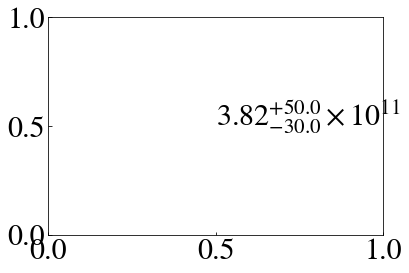

In [16]:
plt.text(0.5,0.5,str1)